## Observations and Insights 

* Most two efective drugs seem to be Capomullin and Ramnicane
* Other drugs ssem to have an effect similar to Placebo
* Capomullin and Ramnicane have more timepoints
* There is a strong positive correlation between mouse weight and average tumor volume


In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

# group by Mouse ID to check for duplicate times for each mouse
grouped_mice_df = mouse_data_complete.groupby('Mouse ID')
n_mice=grouped_mice_df.ngroups
print(f"Number of mice={n_mice}")


Number of mice=249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Count how many each timestamp occurs for each mouse
g=grouped_mice_df['Timepoint'].value_counts()
#come up with a Series with mice which have timestams occurring more than once
duplicated_mice=g[g>1]
# extract list of mice with duplicate times
duplicate_mice_IDS=list(dict.fromkeys(list(np.transpose(list(duplicated_mice.index))[0])))
print(f"list of mice with duplicate times {duplicate_mice_IDS}")


list of mice with duplicate times ['g989']


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicates_df=mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mice_IDS)]
mouse_duplicates_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean_df=mouse_data_complete[~mouse_data_complete['Mouse ID'].isin(duplicate_mice_IDS)]

In [10]:
# Checking the number of mice in the clean DataFrame.
n_mice=mouse_data_clean_df.groupby('Mouse ID').ngroups
print(f"Number of mice={n_mice}")

Number of mice=248


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_group=mouse_data_clean_df.groupby(['Drug Regimen'])[['Drug Regimen','Timepoint','Tumor Volume (mm3)']]
                                                                                                                           
# get list of drugs                                                                                                                   
drug_list=list(drug_regimen_group.groups.keys())
# create empty dictionary with statistics
drug_stat_dict={'Drug':drug_list,'Mean':[],'Median':[],'Variance':[],'StDev':[],'SEM':[]}
# cycle through the list of drugs and get statistics for each drug at Timepoint= 45
for drug in drug_list:
    drug_df=drug_regimen_group.get_group(drug)
    drug_stat_dict['Mean'].append(drug_df[drug_df['Timepoint']==45]['Tumor Volume (mm3)'].mean())
    drug_stat_dict['Median'].append(drug_df[drug_df['Timepoint']==45]['Tumor Volume (mm3)'].median())
    drug_stat_dict['Variance'].append(drug_df[drug_df['Timepoint']==45]['Tumor Volume (mm3)'].var())
    drug_stat_dict['StDev'].append(drug_df[drug_df['Timepoint']==45]['Tumor Volume (mm3)'].std())
    drug_stat_dict['SEM'].append(drug_df[drug_df['Timepoint']==45]['Tumor Volume (mm3)'].sem())
drud_tumor_volume_statistics_df=pd.DataFrame(drug_stat_dict).set_index('Drug')
drud_tumor_volume_statistics_df

,Mean,Median,Variance,StDev,SEM
Drug,,,,,
Capomulin,36.236114,37.311846,31.460537,5.608969,1.223977
Ceftamin,64.132421,64.299830,10.585242,3.253497,0.902358
Infubinol,65.755562,66.083066,11.787426,3.433282,1.144427
Ketapril,70.662958,69.872251,23.229260,4.819674,1.453186
Naftisol,69.265506,69.563621,26.079104,5.106770,1.416363
Placebo,68.084082,69.042841,20.098783,4.483167,1.351726
Propriva,66.258529,64.957562,24.967290,4.996728,1.888586
Ramicane,34.955595,34.848627,30.101010,5.486439,1.226805
Stelasyn,68.438310,69.299149,27.340818,5.228845,1.576556


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
mouse_data_clean_df[mouse_data_clean_df['Timepoint']==45][['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).agg(['mean', 'median','var','std','sem'])


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             36.236114  37.311846  31.460537  5.608969  1.223977
Ceftamin              64.132421  64.299830  10.585242  3.253497  0.902358
Infubinol             65.755562  66.083066  11.787426  3.433282  1.144427
Ketapril              70.662958  69.872251  23.229260  4.819674  1.453186
Naftisol              69.265506  69.563621  26.079104  5.106770  1.416363
Placebo               68.084082  69.042841  20.098783  4.483167  1.351726
Propriva              66.258529  64.957562  24.967290  4.996728  1.888586
Ramicane              34.955595  34.848627  30.101010  5.486439  1.226805
Stelasyn              68.438310  69.299149  27.340818  5.228845  1.576556
Zoniferol             65.960888  65.684689  14.100301  3.755037  1.003576

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

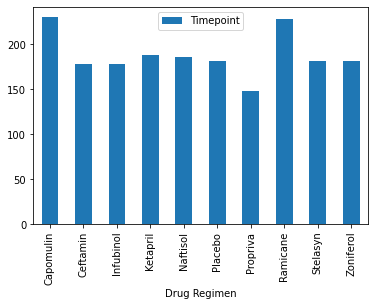

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_data_clean_df[['Drug Regimen','Timepoint']].groupby(['Drug Regimen']).count().plot.bar()


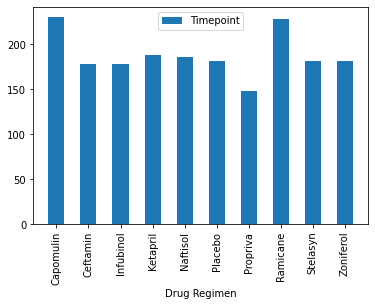

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_count=list(mouse_data_clean_df[['Drug Regimen','Timepoint']].groupby(['Drug Regimen']).count()['Timepoint'])

x_axis = np.arange(len(drug_list))
tick_locations = [value for value in x_axis]

plt.figure()
plt.bar(x_axis, timepoints_count,0.5)
plt.xticks(tick_locations, drug_list, rotation="vertical")
plt.legend(["Timepoint"])
plt.xlabel("Drug Regimen")
plt.show()


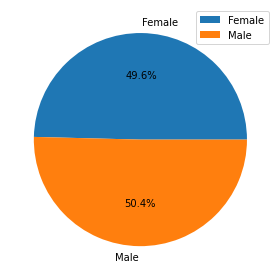

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_data_clean_df[mouse_data_clean_df['Timepoint']==0][['Sex','Timepoint']].groupby('Sex').count().plot(kind="pie", subplots=True,autopct='%1.1f%%')
plt.ylabel("")
plt.tight_layout()


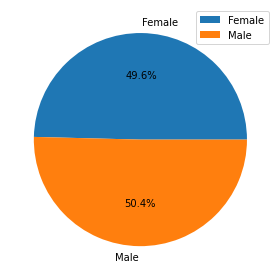

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df=mouse_data_clean_df[mouse_data_clean_df['Timepoint']==0][['Sex','Timepoint']].groupby('Sex').count()
sex_counts=list(sex_df['Timepoint'])
sex_labels=list(sex_df.index)
plt.pie(sex_counts,labels=sex_labels,autopct='%1.1f%%')
plt.legend(sex_labels)
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
latest_timepoint_by_mouse=mouse_data_clean_df[['Mouse ID','Timepoint']].groupby('Mouse ID').max().rename(columns={"Timepoint": "Timepoint_last"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_data_clean_df1 = pd.merge(mouse_data_clean_df, latest_timepoint_by_mouse, how="left", on=["Mouse ID", "Mouse ID"])
tumor_volume_last=mouse_data_clean_df1[mouse_data_clean_df1['Timepoint']==mouse_data_clean_df1['Timepoint_last']]
tumor_volume_last.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint_last
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
promising_treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Statistics names for tumor volumes
stat_labels=['q25','q50','q75','iqr','lower bound','upper bound']

#initialize indicies of the outliers
outlier_indicies=[]

#initialize tumor stats list per drug
tumor_stats_per_drug=[]

#Create dataframe with final tumor volumes for only promising treatments
final_tumor_vols_promising_df=tumor_volume_last[tumor_volume_last['Drug Regimen'].isin(promising_treatments)][['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in promising_treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    per_drug_final_tumor_df=tumor_volume_last[tumor_volume_last['Drug Regimen']==treatment]['Tumor Volume (mm3)']
    Tumor_vol_data.append(list(per_drug_final_tumor_df))
    #calculate quartiles and boundaries for the outliers
    quartiles=per_drug_final_tumor_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    medq=quartiles[0.5]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr_1_5 = iqr * 1.5
    lower_bound = lowerq - iqr_1_5
    upper_bound = upperq + iqr_1_5
    tumor_stats_per_drug.append([lowerq,medq,upperq,iqr,lower_bound,upper_bound])
    # Determine outliers using upper and lower bounds
    outlier_indicies=outlier_indicies+list(per_drug_final_tumor_df[(per_drug_final_tumor_df<lower_bound) | (per_drug_final_tumor_df>upper_bound)]
.index)
    
    
    


# construct dataframe of tumor statistics

tumor_vo_stats_df=pd.DataFrame(tumor_stats_per_drug,columns=stat_labels,index=promising_treatments)


# display tumor statistics
display(tumor_vo_stats_df)

# filter data frame to have only outliers
outliers_df=final_tumor_vols_promising_df.filter(items=outlier_indicies,axis=0)

#display outliers

display(outliers_df)

,q25,q50,q75,iqr,lower bound,upper bound
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
669,c326,Infubinol,36.321346


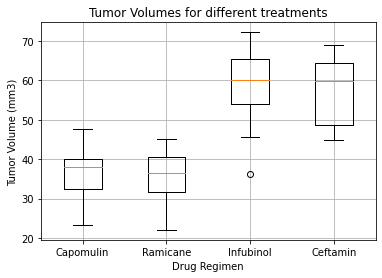

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes for different treatments')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(Tumor_vol_data)
plt.grid()
plt.xticks([1,2,3,4],promising_treatments)
plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

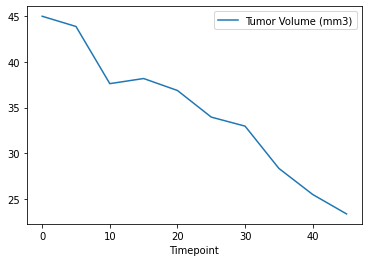

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
example_mouse_df=mouse_data_clean_df[(mouse_data_clean_df['Drug Regimen']=='Capomulin') & (mouse_data_clean_df['Mouse ID']=='s185')][['Timepoint','Tumor Volume (mm3)']]
example_mouse_df.plot.line(x='Timepoint',y='Tumor Volume (mm3)')


<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

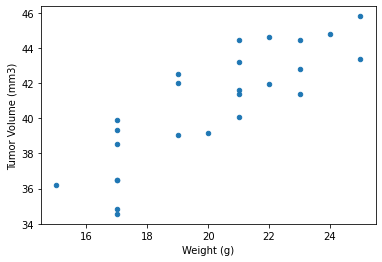

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight_ave_vol_df=mouse_data_clean_df[mouse_data_clean_df['Drug Regimen']=='Capomulin'][['Mouse ID','Weight (g)','Tumor Volume (mm3)']].groupby('Mouse ID').mean()
mouse_weight_ave_vol_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


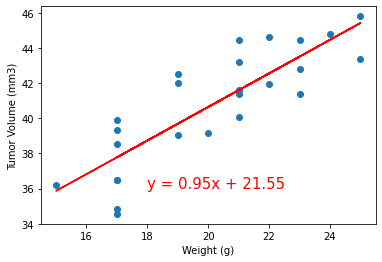

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight_ave_vol_df['Weight (g)']
y_values = mouse_weight_ave_vol_df['Tumor Volume (mm3)']
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()